# A01753176 Gilberto André García Gaytán
# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

## Dataset link: https://www.kaggle.com/datasets/ramjasmaurya/footballsoccer-clubs-ranking

# Preprocesamiento de Datos

In [2]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('Soccer_Football Clubs Ranking in june.csv')

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip().str.replace('\r\n', '', regex=True)

# Definir características y objetivo
features = ['point score', '1 year change', 'country']
target = 'ranking'

# Eliminar filas con valores faltantes
df_cleaned = df[features + [target]].dropna()

# Dividir los datos en características y objetivo
X = df_cleaned[features]
y = df_cleaned[target]

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear un pipeline de preprocesamiento
numeric_features = ['point score', '1 year change']
numeric_transformer = StandardScaler()

categorical_features = ['country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar transformaciones a los conjuntos de entrenamiento y validación
# y convertir el resultado a una matriz densa
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()

# Construcción y Entrenamiento del Modelo

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Definir la arquitectura del modelo convolutivo 1D
model = Sequential([
    # Capa convolutiva 1D con 32 filtros, tamaño del filtro 3, función de activación ReLU y entrada de forma (número de características, 1)
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    # Capa de max pooling 1D con tamaño de ventana 2
    MaxPooling1D(2),
    # Capa de aplanado para convertir los mapas de características 1D en un vector 1D
    Flatten(),
    # Capa completamente conectada (densa) con 64 neuronas y función de activación ReLU
    Dense(64, activation='relu'),
    # Capa de salida con una neurona para la regresión
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 2442385.5000 - val_loss: 2382479.0000
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 1514663.3750 - val_loss: 898979.1875
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 654975.6250 - val_loss: 689699.3750
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 618326.1250 - val_loss: 679572.3750
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 611068.6250 - val_loss: 673007.3750
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 603875.1875 - val_loss: 660010.4375
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 592195.4375 - val_loss: 646707.9375
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 577209.0000 - val_loss: 637261.3125
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 559041.6250 - val_loss: 603808.3750
Epoch 10/100
70/

# Análisis de Resultados

### Disminución de la Pérdida: La pérdida ha disminuido constantemente a lo largo de las épocas, lo cual es una buena señal. Esto indica que el modelo está aprendiendo de los datos.
### Pérdida en Entrenamiento vs. Validación: La diferencia entre la pérdida de entrenamiento y la de validación parece ser razonablemente pequeña, lo cual sugiere que no hay un sobreajuste significativo.

## Visualizar la Pérdida

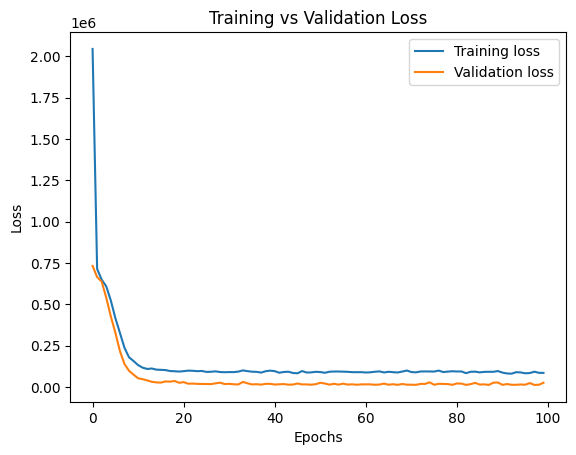

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Con base en esta gráfica se puede observar que las líneas están muy juntas, lo que indica que la pérdida de entrenamiento y validación son muy similares a lo largo del entrenamiento, lo cual es una buena señal de que el modelo no está sobreajustando significativamente a los datos de entrenamiento.

# Mejora del modelo
## Mejoras en el Modelo de Deep Learning

### Regularización:
- **Dropout**: Se introdujo Dropout con una tasa de 0.5 en dos capas para prevenir el sobreajuste. El Dropout "apaga" aleatoriamente un conjunto de neuronas durante el entrenamiento, lo que ayuda a que el modelo sea menos sensible a las características específicas de los datos de entrenamiento.

### Ajuste de Arquitectura:
- **Capas y Neuronas**: Se aumentó el número de neuronas en la primera capa oculta a 128 para permitir que el modelo capture mejor la complejidad de los datos. Se mantuvo una segunda capa de 64 neuronas para una representación más rica y se añadió Dropout después de cada capa.

### Expectativas:
Estos cambios están destinados a mejorar la generalización del modelo y reducir el riesgo de sobreajuste. El Dropout debería permitir que el modelo sea más robusto al ruido en los datos de entrada.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Definir la arquitectura mejorada del modelo convolutivo 1D
model = Sequential([
    # Capa convolutiva 1D con 32 filtros, tamaño del filtro 3, función de activación ReLU y entrada de forma (número de características, 1)
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    # Capa de max pooling 1D con tamaño de ventana 2
    MaxPooling1D(2),
    # Capa de aplanado para convertir los mapas de características 1D en un vector 1D
    Flatten(),
    # Capa completamente conectada (densa) con 128 neuronas y función de activación ReLU
    Dense(128, activation='relu'),
    # Dropout del 50% para prevenir el sobreajuste
    Dropout(0.5),
    # Capa completamente conectada (densa) con 64 neuronas y función de activación ReLU
    Dense(64, activation='relu'),
    # Dropout del 50% para prevenir el sobreajuste
    Dropout(0.5),
    # Capa de salida con una neurona para la regresión
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con las mejoras
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
70/70 [==============================] - 2s 12ms/step - loss: 2044719.8750 - val_loss: 732281.0000
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 713682.6875 - val_loss: 664718.5000
Epoch 3/100
70/70 [==============================] - 1s 7ms/step - loss: 649025.8750 - val_loss: 637107.1875
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 608610.1875 - val_loss: 540244.1875
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 523651.9375 - val_loss: 427369.0000
Epoch 6/100
70/70 [==============================] - 0s 7ms/step - loss: 416765.7500 - val_loss: 328722.5000
Epoch 7/100
70/70 [==============================] - 0s 7ms/step - loss: 327480.0000 - val_loss: 217738.0469
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 237408.4688 - val_loss: 138923.7969
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 179504.9062 - val_loss: 97886.9531
Epoch 10/100
70/70

In [8]:
## Guardar el modelo
model.save('modelo_mejorado.h5')

/home/gggandre/deep_learning/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##  Interfaz Gráfica para Predicciones
#### La GUI permitirá al usuario ingresar los datos necesarios y luego mostrará la predicción del modelo.

In [9]:
## Cargar modelo en la GUI
modelo_cargado = tf.keras.models.load_model('modelo_mejorado.h5')

## Traer lista de países

In [10]:
import pandas as pd

# Recargamos el dataset para extraer la lista de países
file_path = 'Soccer_Football Clubs Ranking in june.csv'
df_countries = pd.read_csv(file_path)
# Limpiamos los nombres de las columnas
df_countries.columns = df_countries.columns.str.strip().str.replace('\r\n', '', regex=True)

# Extraemos la lista única de países
list_of_countries = df_countries['country'].unique().tolist()
list_of_countries[:5]  # Mostramos los primeros 5 para verificar

['Germany', 'Paraguay', 'Angola', 'Denmark', 'Norway']

In [11]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Asumiendo que 'list_of_countries' es una lista de todos los países únicos en tu conjunto de datos
countries = np.array(list_of_countries).reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
encoder.fit(countries)

# Función para transformar la entrada del país
def transform_country_input(country_name):
    # El país ingresado por el usuario se convierte en un array para que coincida con el ajuste del encoder
    country_array = np.array([country_name]).reshape(-1, 1)
    # Codificar el país utilizando el encoder ajustado y devolver el array codificado
    country_encoded = encoder.transform(country_array)
    return country_encoded.flatten()

/home/gggandre/deep_learning/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import tensorflow as tf

# Cargar el modelo entrenado (ajusta la ruta según sea necesario)
modelo_cargado = tf.keras.models.load_model('modelo_mejorado.h5')

# Definir la función para hacer predicciones
def hacer_prediccion():
    try:
        # Asegurarse de que el usuario ingresó números válidos
        point_score = float(entry_point_score.get())
        year_change = float(entry_year_change.get())
    except ValueError:
        messagebox.showerror('Error', 'Por favor, introduce datos numéricos válidos para el puntaje y el cambio anual.')
        return  # Salir de la función si los datos no son válidos

    # Asegurarse de que el país está en la lista de países conocidos
    country_input = country_var.get()
    if country_input not in list_of_countries:
        messagebox.showerror('Error', 'Por favor, selecciona un país de la lista.')
        return

    # Procesar la entrada del país
    country_encoded = transform_country_input(country_input)

    # Asegurarse de que el array de entrada tenga la forma correcta antes de hacer la predicción
    input_data = np.hstack([np.array([point_score, year_change]), country_encoded]).reshape(1, -1)

    # Verificar la longitud de input_data
    if input_data.shape[1] == 136:  # Si la longitud es 136, eliminar una característica extra
        # Eliminar la última característica como ejemplo, ajustar según sea necesario
        input_data = input_data[:, :-1]

    # Realizar la predicción utilizando el modelo cargado
    prediction = modelo_cargado.predict(input_data)
    messagebox.showinfo('Predicción', f'La predicción del ranking es: {prediction[0][0]}')

# Crear la ventana principal
root = tk.Tk()
root.title('Predicción del Ranking de Clubes de Fútbol')

# Crear y posicionar los elementos de la interfaz
tk.Label(root, text='Point Score:').pack()
entry_point_score = tk.Entry(root)
entry_point_score.pack()

tk.Label(root, text='1 Year Change:').pack()
entry_year_change = tk.Entry(root)
entry_year_change.pack()

tk.Label(root, text='Country:').pack()
country_var = tk.StringVar()
country_combobox = ttk.Combobox(root, textvariable=country_var)
country_combobox['values'] = list_of_countries
country_combobox.pack()

# Botón para realizar la predicción
predict_button = tk.Button(root, text='Predecir Ranking', command=hacer_prediccion)
predict_button.pack()

# Iniciar la interfaz gráfica
root.mainloop()

1/1 [==============================] - 0s 58ms/step
